# Day 3 Pokemon simple analysis

<h3> Importing Libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import re
import random
from sklearn.preprocessing import OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression

In [79]:
df = pd.read_csv("Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


<h4> Lets remove Name and ID

In [80]:
X = df.drop(["Legendary"], axis=1)
X = X.drop(["#", "Name"], axis=1)
y = df["Legendary"]
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 800 entries, 0 to 799
Series name: Legendary
Non-Null Count  Dtype
--------------  -----
800 non-null    bool 
dtypes: bool(1)
memory usage: 928.0 bytes


<h4> Lets categorize X and y 

In [81]:
# Before categorizing we need to deal with NaN values of Type 2
X["Type 2"] = X["Type 2"].fillna("0")
Type1_array = X["Type 1"].unique().tolist()
Type2_array = X["Type 2"].unique().tolist()
Type1_array.sort()
Type2_array.sort()



OH = OneHotEncoder()

X_encoded_1 = OH.fit_transform(X[["Type 1"]]).toarray()
X_encoded_2 = OH.fit_transform(X[["Type 2"]]).toarray()
X[Type1_array] = X_encoded_1
X[Type2_array] = X_encoded_2

y[:] = y[:].astype(int)

/tmp/ipykernel_511/4189274668.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[:] = y[:].astype(int)


In [82]:
# Now we delete the rows we dont need
X = X.drop(["Type 1", "Type 2"], axis=1)


In [83]:
X.shape

(800, 27)

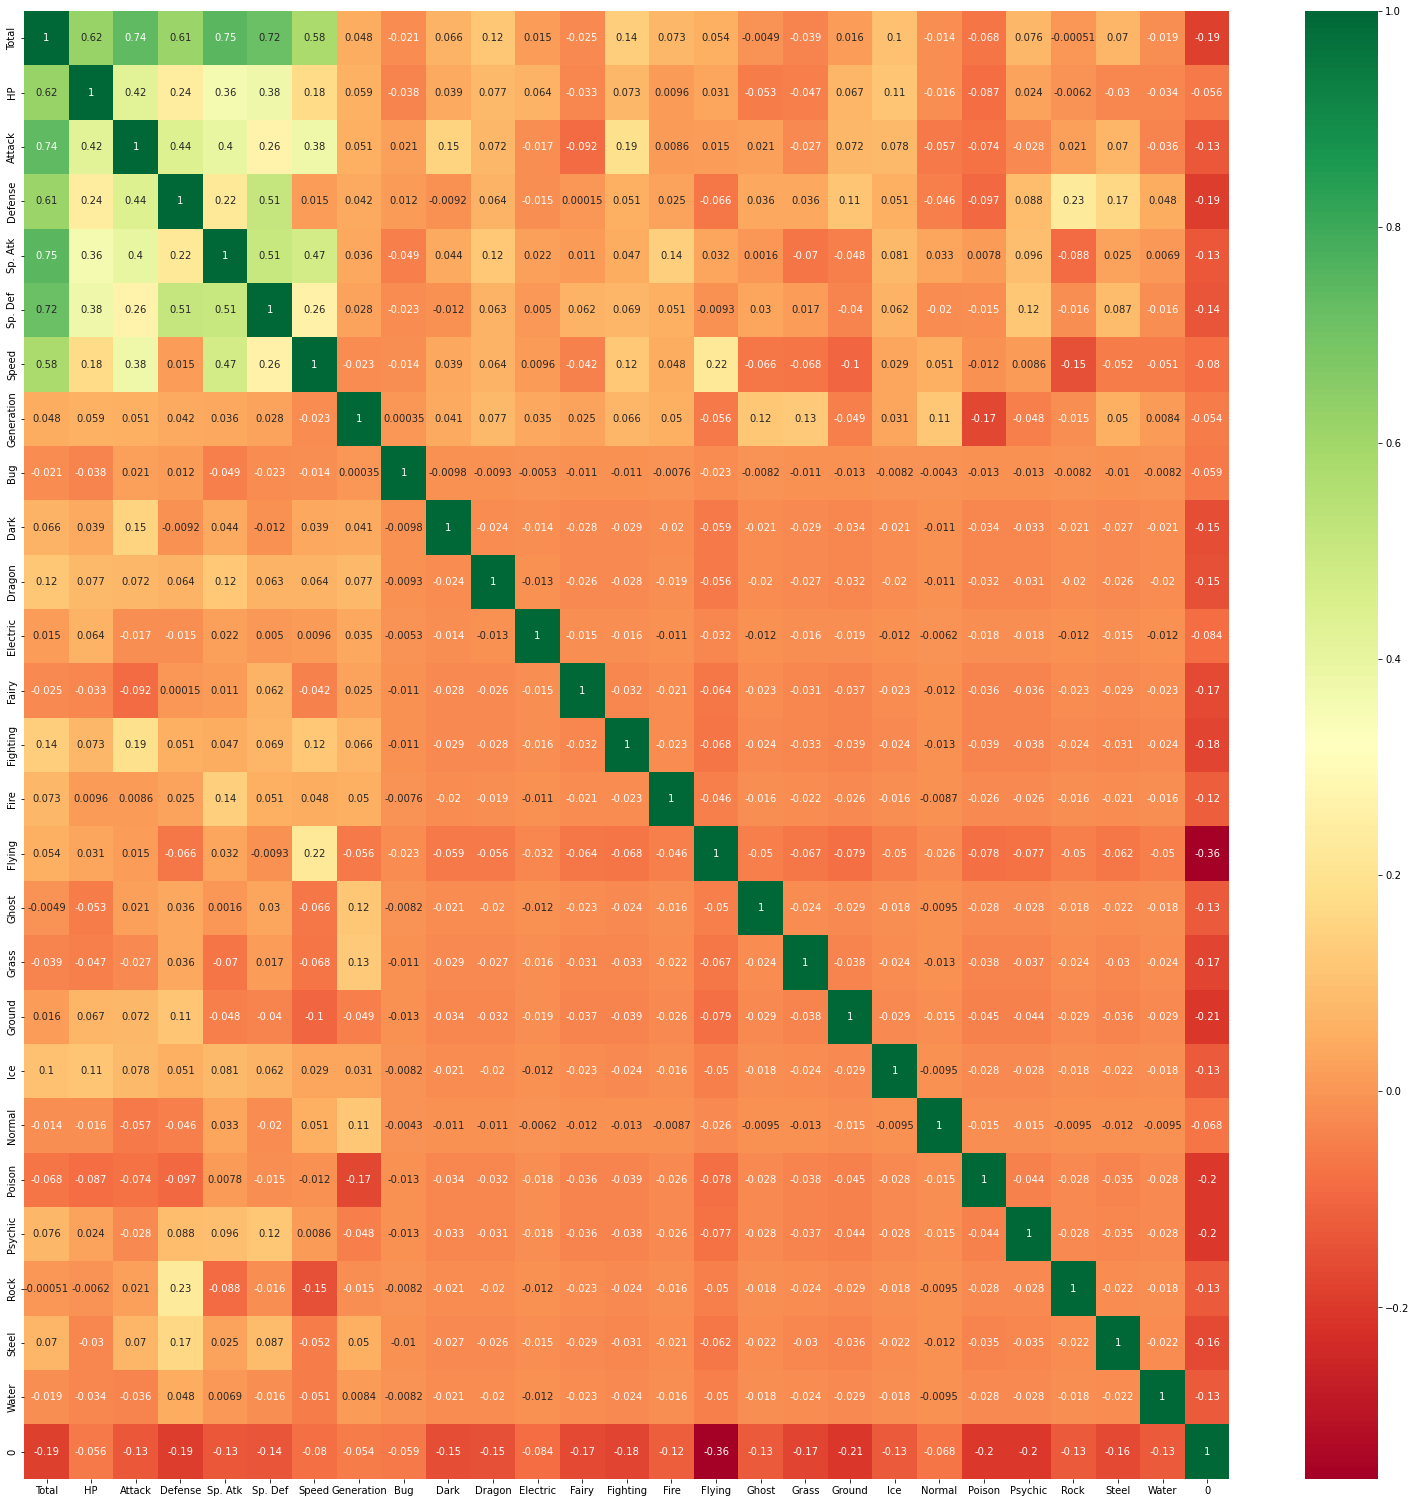

In [84]:
#lets check the heatmap of these features

corr_mat = X.corr()
top_corr = corr_mat.index
plt.figure(figsize=(27,27))
s = sns.heatmap(X[top_corr].corr(), annot=True, cmap="RdYlGn")

In [85]:
# here total seems to be not a necessity so we can drop it
X = X.drop(["Total"], axis=1)
X.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Bug,Dark,Dragon,...,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,0
0,45,49,49,65,65,45,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,60,62,63,80,80,60,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,80,82,83,100,100,80,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,80,100,123,122,120,80,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,39,52,43,60,50,65,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [88]:
y = y.astype(int)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Legendary, dtype: int64

In [89]:
#Lets do some classification analysis. Since logistic regression doesn't need normalisation, we do it without it
X = X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=910)
LR = LogisticRegression()
LR.fit(X_train, y_train)
pred = LR.predict(X_test)
score = accuracy_score(pred, y_test)
print(score)

0.925


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
